In [1]:
import kaggle
import os 

"""
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that 
customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset 
presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset 
is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to 
confidentiality issues, we cannot provide the original features and more background information about the data.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been 
transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction 
and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used 
for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case 
of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve 
(AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

for more info, visit https://www.kaggle.com/mlg-ulb/creditcardfraud
"""

os.system('kaggle datasets download -d mlg-ulb/creditcardfraud')

0

In [2]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
import pandas as pd

df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


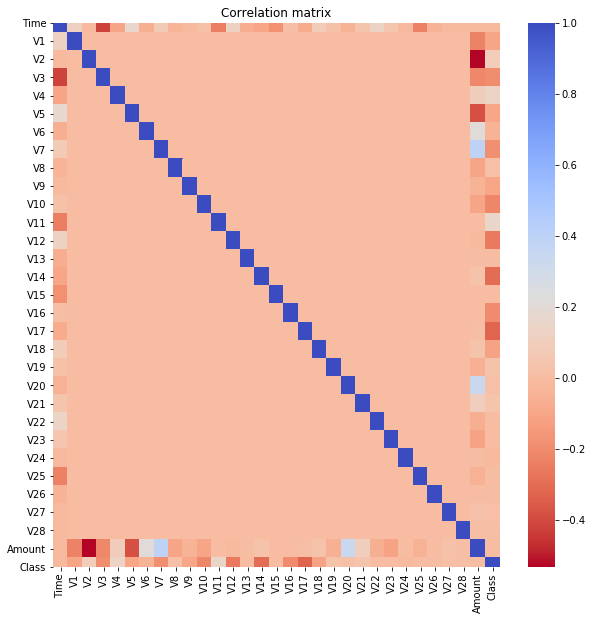

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation matrix')
sns.heatmap(corr, cmap='coolwarm_r')

In [20]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0 as normal, 1 as a fraudulent transaction, and the distribution is heavily skewed towards class 0. Also, one can see from correlation matrix and sample mean, standard deviation, the data has already been PCA processed, so the features are lineary independent and normalized.

# Supervised baseline model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

# important to use cross-k fold validation to access accurately for model performance
kf = KFold(n_splits=3, shuffle=True)

cross_val_test_acc = []
for train_ind, test_ind in kf.split(X):
    clf = LogisticRegression(C=10, random_state=0, max_iter=1000)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    cross_val_test_acc.append(accuracy_score(y_test, y_pred))

cross_val_test_accuracy = np.mean(cross_val_test_acc)
print('Cross validation test accuray: {}'.format(cross_val_test_accuracy))

Cross validation test accuray: 0.999139768248027


The accuracy is not surprisingly high for this skewed dataset since if one were to guess all 1s, he would already archieve 99.8% accuracy. Therefore, accuracy is not a good metric.

Confusion matrix:


,Predicted: 0,Predicted: 1
Actual: 0,94723,21
Actual: 1,63,128


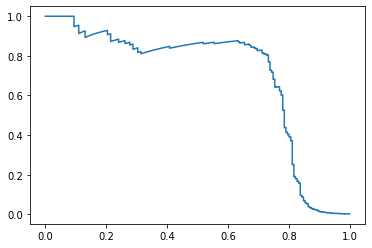

In [32]:
# precision-recall curve instead of ROC AUC since the latter is sensitive to small sample size of skewed class
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from IPython.display import display

# to use precision recall metric, different threshold for the prob of predicted classes are used instead
y_scores = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
confusion_df = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
display(pd.DataFrame(confusion_df, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1']))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])

import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.show()

In [28]:
# to summarize the quality of our classifier
from sklearn import metrics

pr_auc = metrics.auc(recall, precision)
print('Precision-recall area under curve: {}'.format(pr_auc))

Precision-recall area under curve: 0.6761714043272207


From this perspective, the model is actually not doing a good job at classifying between fraud and non-fraud cases, since a perfect classifier would have a auc score of 1 and its area will cover up to the top right corner, in that case, that auc score would translate to a perfect precision score of 1 (indicating how much of one's predictions are right) and recall score of 1 (indicating how good one can capture the fraudulent cases actually happened).

# Enter SMOTE (Synthetic Minority Over-sampling Technique)
The motivation for SMOTE is not hard to understand, in a supervised algorithm, the loss function is heavily skewed to getting the majority right since by definition, loss function is proportional to the sum of all sample's error. Therefore, no matter how hard the algorithm tries, it will never have enough signal (gradient proposed by the minority class) to learn to classify the minority class.

In essence, what SMOTE does is to upsample the minority class to make the dataset balance, by doing so, one can expect an improvement in pr-auc score.

Using TensorFlow backend.


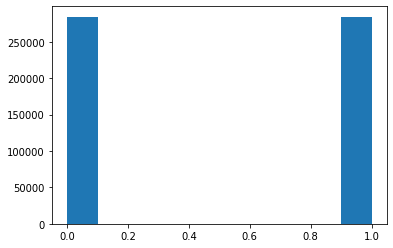

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)
plt.hist(y_res)
plt.show()

Now the dataset is balanced.

In [35]:
kf = KFold(n_splits=3, shuffle=True)

cross_val_test_acc = []
for train_ind, test_ind in kf.split(X_res):
    clf = LogisticRegression(C=10, random_state=0, max_iter=1000)
    
    X_train, X_test = X_res[train_ind], X_res[test_ind]
    y_train, y_test = y_res[train_ind], y_res[test_ind]
    
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    cross_val_test_acc.append(accuracy_score(y_test, y_pred))

cross_val_test_accuracy = np.mean(cross_val_test_acc)
print('Cross validation test accuray: {}'.format(cross_val_test_accuracy))

Cross validation test accuray: 0.967163197788938


The test accuracy did drop but does it mean it is doing a worse job, wait and see. Moreover, the other aspect of why accuracy doesn't really how good a model is depends on how one define 'good'. If 'good' means high precision, so out of all prediction one made, one wants to make as less mistake as possible, then one would need to be very stingent to file a fraud warning (increase the threshold). The trade-off would be that one will catch less fraud actually happened (recall).

Confusion matrix:


,Predicted: 0,Predicted: 1
Actual: 0,92665,1901
Actual: 1,3466,91511


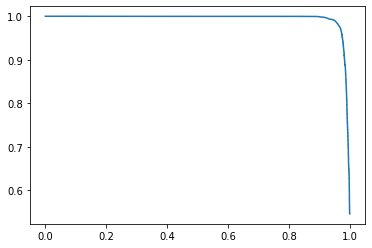

Precision-recall area of test set under curve: 0.9945929127542739


In [36]:
y_scores = clf.predict_proba(X_test) 

confusion_df = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
display(pd.DataFrame(confusion_df, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1']))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])
plt.plot(recall, precision)
plt.show()

pr_auc = metrics.auc(recall, precision)
print('Precision-recall area of test set under curve: {}'.format(pr_auc))

Using SMOTE, one can see the accuracy decreased but that is normal, because that reveals the actual difficulty of classifying a fraudulent claim. And from the pr-auc score, it is now proved the classifier indeed learned much better to classify between fraud and normal transaction.

The rest of the problem remaining how to choose a 'good' threshold.

# Choosing threshold for a classifier

Depend on what the costs for tp, fp, tn, fn are the revenue generated by model of different threshold can change rather drastically in a real situation. Say like in a cancer diagnosis scenario, the doctor does not want to afford mistreating a health person and also does not want miss curing a patient who actually have cancer. Assuming, for the sake of argument, both error cost equally for the doctor, so one wants to have a balance between the 2.

In [44]:
"""
F1-metric harmonic mean of precision and recall, comparing arithmetic to harmonic mean, the latter penalize 
more when 2 numbers deviate from each other more.
"""

# example 
a = 0.7
b = 0.6
am_c = (a + b)/2
hm_c = (1/a + 1/b)**-1
print('Arithmetic mean for close numbers: {}'.format(am_c))
print('Harmonic mean for close numbers: {}\n'.format(hm_c))

a = 0.9
b = 0.3
am_d = (a + b)/2
hm_d = (1/a + 1/b)**-1
print('Arithmetic mean for distant numbers: {}'.format(am_c))
print('Harmonic mean for distant numbers: {}\n'.format(hm_c))

print('Change in arithmetic mean = {}'.format(abs(am_d - am_c)))
print('Change in harmonic mean = {}'.format(abs(hm_d - hm_c)))

Arithmetic mean for close numbers: 0.6499999999999999
Harmonic mean for close numbers: 0.32307692307692304

Arithmetic mean for distant numbers: 0.6499999999999999
Harmonic mean for distant numbers: 0.32307692307692304

Change in arithmetic mean = 0.04999999999999993
Change in harmonic mean = 0.09807692307692306


In [51]:
def f1_score(p, r):
    return 2 * (1/p + 1/r) ** -1

max_pair_ind = np.argmax([f1_score(precision[i], recall[i]) for i in range(len(thresholds))])
print('The balanced model has a threshold of {} for fraud detection with F1 score = {}'\
      .format(thresholds[max_pair_ind], f1_score(precision[max_pair_ind], recall[max_pair_ind])))

The balanced model has a threshold of 0.5428320022487357 for fraud detection with F1 score = 0.9716238079019073
